In [55]:
import pandas as pd
import math
import numpy as np
import pylab
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from scipy.stats import chisquare
import scipy
plt.rcParams['figure.dpi'] = 150

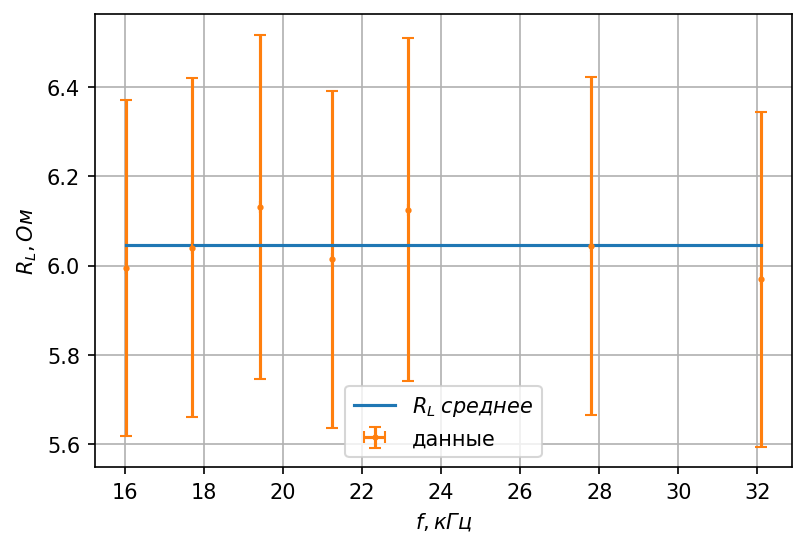

In [81]:
C = np.array([25.1, 33.2, 47.3, 57.4, 67.5, 82.7, 101.6]) #нФ
C *= 1e-9 # Ф
f_0 = np.array([32.081, 27.783, 23.176, 21.253, 19.427, 17.700, 16.044]) #кГц
f_0 *= 1000 * 2 * np.pi #omega_0
U = np.array([0.7463, 0.6944, 0.5077, 0.4311, 0.3631, 0.2816, 0.2548]) # В
E = np.array([0.1510, 0.1509, 0.1508, 0.1507, 0.1506, 0.1506, 0.1505])

L = 1 / (f_0 ** 2 * C) #Гн
rho = np.sqrt(L / C)

tau_mean = 318 * 1e-6 # s
sigma_tau_mean = 20 * 1e-6 #s

Q_result = f_0 * tau_mean / 2
Z_res = Q_result * rho
R_sum = Z_res / Q_result ** 2
R_smax = 1e-3 * rho
R_L = R_sum - R_smax

#plots
plt.plot(f_0 / (2 * np.pi) / 1e3, [R_L.mean()] * len(R_L), label = r'$R_L\; среднее$')
#errorbar
plt.errorbar(f_0 / (2 * np.pi) / 1e3, R_L, xerr=0, yerr=sigma_tau_mean / tau_mean * R_L, fmt='o', markersize=2, capsize=3, label='данные')

eps_R_L = np.std(R_L) / R_L.mean() + sigma_tau_mean / tau_mean # answer))

plt.grid()
plt.xlabel(r'$f, кГц$')
plt.ylabel(r'$R_L, Ом$')
plt.legend()
plt.savefig('plots/R_l.png')
plt.show()

In [75]:

df = pd.DataFrame({r'C, нФ': np.around(C * 1e9, 1), 'fo, кГц': np.around(f_0 / (2 * np.pi) / 1e3, 4), 'U, B': U, 'E, B': E, 'L, мкГн': np.around(L * 1e6, decimals=2), 'ρ, Ом': np.around(rho, decimals=2), 'Z, Ом': np.around(Z_res, decimals=0), 'Q': np.around(Q_result, decimals=2), 'Rsum': np.around(R_sum, 2), 'Rsmax': np.around(R_smax, 2), 'Rl': np.around(R_L, 2)})
df.to_csv('123.csv')
df


,"C, нФ","fo, кГц","U, B","E, B","L, мкГн","ρ, Ом","Z, Ом",Q,Rsum,Rsmax,Rl
0,25.1,32.081,0.7463,0.1510,980.55,197.65,6335.0,32.05,6.17,0.20,5.97
1,33.2,27.783,0.6944,0.1509,988.43,172.55,4789.0,27.76,6.22,0.17,6.04
2,47.3,23.176,0.5077,0.1508,997.02,145.18,3362.0,23.15,6.27,0.15,6.13
3,57.4,21.253,0.4311,0.1507,976.98,130.46,2770.0,21.23,6.14,0.13,6.01
4,67.5,19.427,0.3631,0.1506,994.32,121.37,2356.0,19.41,6.25,0.12,6.13
5,82.7,17.700,0.2816,0.1506,977.66,108.73,1923.0,17.68,6.15,0.11,6.04
6,101.6,16.044,0.2548,0.1505,968.55,97.64,1565.0,16.03,6.09,0.10,5.99


$ Возьмем\; C_2, C_4 $

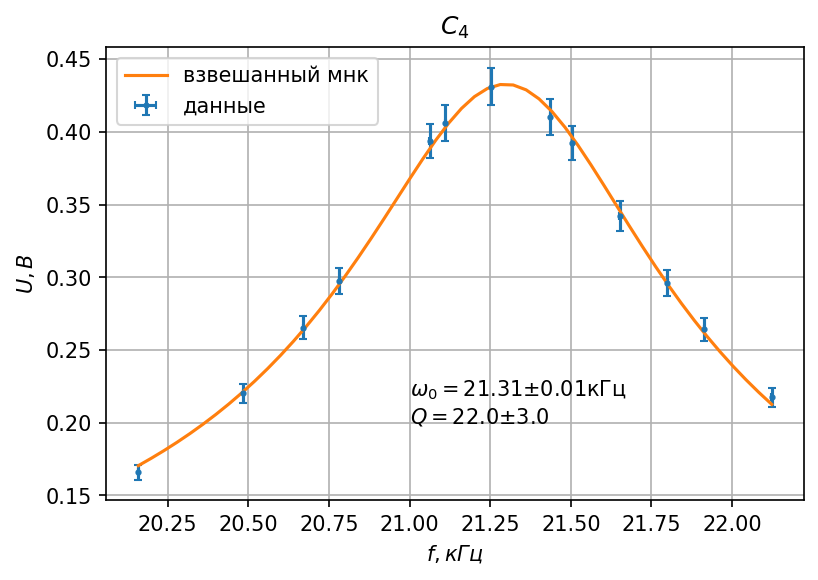

In [82]:
def resonans(arr, p_1, p_2, omega_0):
    return np.abs(p_1) / np.sqrt((arr**2 - omega_0**2)**2 + np.abs(p_2) * arr**2)

#C_4
U = np.array([0.4311, 0.4103, 0.3923, 0.3424, 0.2962, 0.2642, 0.2174, 0.4060, 0.3935, 0.2974, 0.2653, 0.2202, 0.1659]) #В
f = np.array([21.253, 21.436, 21.504, 21.651, 21.799, 21.913, 22.123, 21.111, 21.062, 20.781, 20.670, 20.485, 20.159])#кГц

#errors
sigma_f = 0.001 #кГц
epsilon_u = 0.03 #percents
plt.errorbar(f, U, xerr=[sigma_f] * len(f), yerr=U * epsilon_u, markersize=2, fmt='o', label='данные', capsize=2)

#curve fit
popt, pcov = curve_fit(resonans, f, U, sigma=U * epsilon_u, absolute_sigma=True)
plt.plot(np.linspace(f.min(), f.max()), resonans(np.linspace(f.min(), f.max()), *popt), label='взвешанный мнк')


# finding Q
omega_0 = popt[-1]
U_rez = resonans(omega_0, *popt)
beta = np.sqrt(np.abs(popt[-2]) / 4)
Q = omega_0 / (2 * beta)
sigma_Q = (np.sqrt(pcov[-1][-1]) / omega_0 + np.sqrt(pcov[-2][-2]) / beta) * Q
text = r'$\omega_0 = $' + str(round(omega_0, 2)) + r'$\pm$' + str(round(np.sqrt(pcov[-1][-1]), 2)) + 'кГц\n'
text += r'$Q=$' + str(round(Q, 0)) + r'$\pm$' + str(round(sigma_Q, 0))
plt.text(21.0, 0.2, text)

plt.xlabel(r'$f, кГц$')
plt.title(r'$C_4$')
plt.ylabel(r'$U, B$')
plt.grid()
plt.legend()
plt.savefig('plots/C_4_ampl.png')
plt.show()

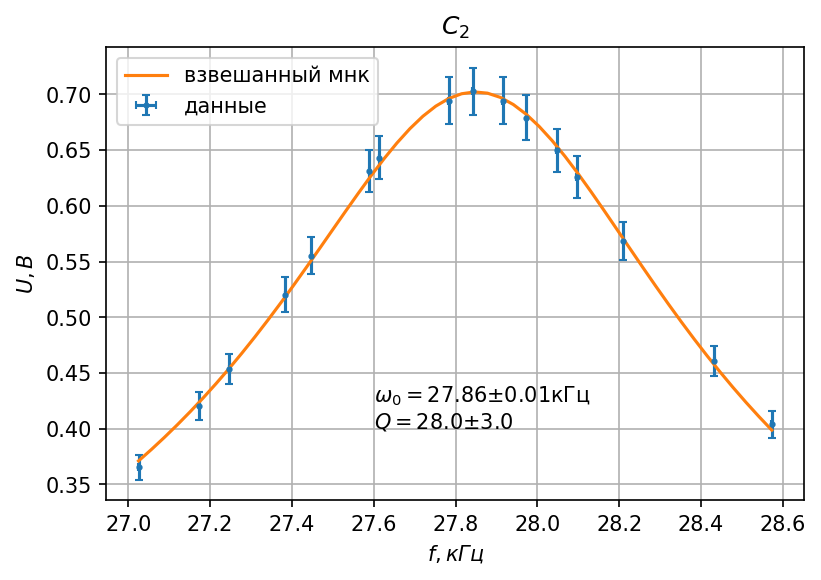

In [83]:
# C_2

U = np.array([0.6944, 0.6432, 0.6312, 0.5553, 0.5203, 0.4533, 0.4201, 0.3652, 0.7029, 0.6944, 0.6792, 0.6499, 0.6262, 0.5683, 0.4607, 0.4040]) #B

f = np.array([27.783, 27.613, 27.589, 27.447, 27.383, 27.246, 27.174, 27.025, 27.842, 27.915, 27.972, 28.047, 28.096, 28.210, 28.432, 28.573])

#errors
sigma_f = 0.001 #кГц
epsilon_u = 0.03 #percents
plt.errorbar(f, U, xerr=[sigma_f] * len(f), yerr=U * epsilon_u, markersize=2, fmt='o', label='данные', capsize=2)

#curve fit
popt, pcov = curve_fit(resonans, f, U, sigma=U * epsilon_u, absolute_sigma=True)
plt.plot(np.linspace(f.min(), f.max()), resonans(np.linspace(f.min(), f.max()), *popt), label='взвешанный мнк')


# finding Q
omega_0 = popt[-1]
U_rez = resonans(omega_0, *popt)
beta = np.sqrt(np.abs(popt[-2]) / 4)
Q = omega_0 / (2 * beta)
sigma_Q = (np.sqrt(pcov[-1][-1]) / omega_0 + np.sqrt(pcov[-2][-2]) / beta) * Q
text = r'$\omega_0 = $' + str(round(omega_0, 2)) + r'$\pm$' + str(round(np.sqrt(pcov[-1][-1]), 2)) + 'кГц\n'
text += r'$Q=$' + str(round(Q, 0)) + r'$\pm$' + str(round(sigma_Q, 0))
plt.text(27.6, 0.4, text)

plt.xlabel(r'$f, кГц$')
plt.title(r'$C_2$')
plt.ylabel(r'$U, B$')
plt.grid()
plt.legend()
plt.savefig('plots/C_2_ampl.png')
plt.show()

#  ФЧХ

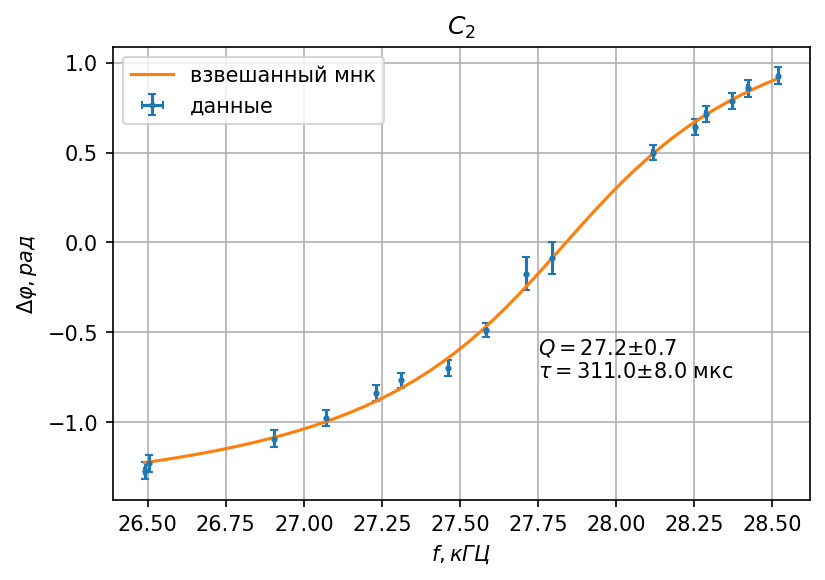

In [84]:
def phase(arr, p_1, p_2, omega_0):
    return p_1 + np.arctan(p_2 * (arr - omega_0))

#C_2
f = np.array([27.712, 27.794, 28.117, 28.251, 28.286, 28.372, 28.421, 28.518, 27.582, 27.461, 27.311, 27.232, 27.071, 26.905, 26.505, 26.490]) # кГЦ
x = np.array([-1, -0.5, 7, 9, 10, 11, 12, 13, -7, -10, -11, -12, -14, -16, -18, -19]) # дел
x_0 = np.array([18, 18, 44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 46, 46, 47]) # дел
delta_phi = x/x_0 * np.pi

#errors
sigma_x = sigma_x_0 = 0.5 #дел
sigma_f = 0.001 # кГЦ
eps_frac = []
for i in range(len(x)):
    eps_frac.append(sigma_x / np.abs(x[i]) + sigma_x_0 / np.abs(x_0[i]))
plt.errorbar(f, delta_phi, xerr=sigma_f, yerr=eps_frac * delta_phi, fmt='o', capsize=2, markersize=2, label='данные')

#curve fit
popt, pcov = curve_fit(phase, f, delta_phi, sigma=eps_frac * delta_phi, absolute_sigma=True, p0=[-0.01, 2, 27])
plt.plot(np.linspace(f.min(), f.max()), phase(np.linspace(f.min(), f.max()), *popt), label='взвешанный мнк', )


# find Q and tau
Q = popt[-1] * popt[-2] / 2
sigma_Q = (np.sqrt(pcov[-1][-1]) / np.abs(popt[-1]) + np.sqrt(pcov[-2][-2]) / np.abs(popt[-2])) * Q
text = r'$Q = $' + str(round(Q, 1)) + r'$\pm$' + str(round(sigma_Q, 1))
tau = popt[-2] / (2 * np.pi) * 1000 #mSeconds
text += '\n' + r'$\tau = $' + str(round(tau, 0))+ r'$\pm$' + str(round(np.sqrt(pcov[-2][-2]) / popt[-2] * tau, 0))
text += ' мкс'

plt.ylabel(r'$\Delta \varphi, рад$')
plt.xlabel(r'$f, кГЦ$')
plt.grid()
plt.text(27.75, -0.75, text)
plt.legend()
plt.title(r'$C_2$')
plt.savefig('plots/C_2_phase.png')
plt.show()

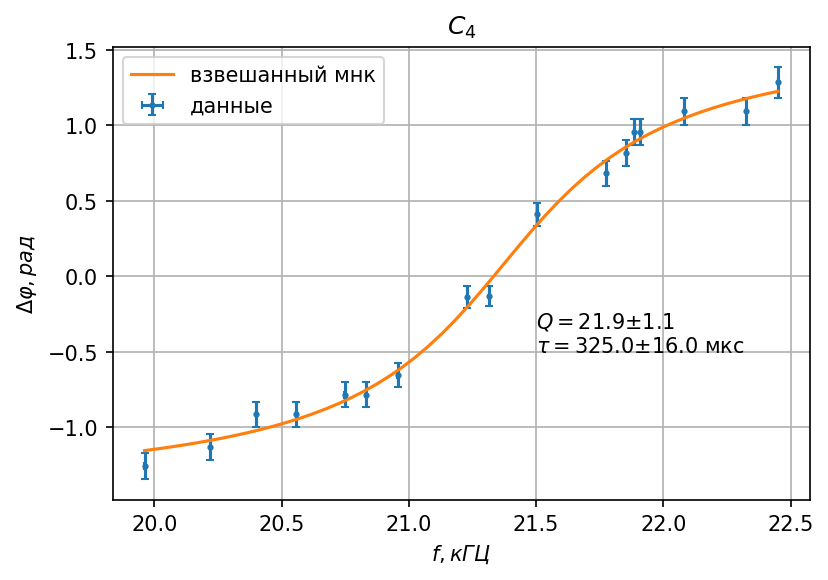

In [85]:
#C_4
f = np.array([21.229, 21.314, 21.504, 21.776, 21.854, 21.885, 21.908, 22.081, 22.324, 22.451, 20.956, 20.557, 20.220, 19.961, 20.401, 20.748, 20.831]) # кГц
x = np.array([-1, -1, 3, 5, 6, 7, 7, 8, 8, 9, -5, -7, -9, -10, -7, -6, -6]) # дел
x_0 = np.array([23, 24, 23, 23, 23, 23, 23, 23, 23, 22, 24, 24, 25, 25, 24, 24, 24]) # дел
delta_phi = x/x_0 * np.pi

#errors
sigma_x = sigma_x_0 = 0.5 #дел
sigma_f = 0.001 # кГЦ
eps_frac = []
for i in range(len(x)):
    eps_frac.append(sigma_x / np.abs(x[i]) + sigma_x_0 / np.abs(x_0[i]))
plt.errorbar(f, delta_phi, xerr=sigma_f, yerr=eps_frac * delta_phi, fmt='o', capsize=2, markersize=2, label='данные')

#curve fit
popt, pcov = curve_fit(phase, f, delta_phi, sigma=eps_frac * delta_phi, absolute_sigma=True, p0=[-0.01, 1, 24])
plt.plot(np.linspace(f.min(), f.max()), phase(np.linspace(f.min(), f.max()), *popt), label='взвешанный мнк', )


# find Q and tau
Q = popt[-1] * popt[-2] / 2
sigma_Q = (np.sqrt(pcov[-1][-1]) / np.abs(popt[-1]) + np.sqrt(pcov[-2][-2]) / np.abs(popt[-2])) * Q
text = r'$Q = $' + str(round(Q, 1)) + r'$\pm$' + str(round(sigma_Q, 1))
tau = popt[-2] / (2 * np.pi) * 1000 #mSeconds
text += '\n' + r'$\tau = $' + str(round(tau, 0))+ r'$\pm$' + str(round(np.sqrt(pcov[-2][-2]) / popt[-2] * tau, 0))
text += ' мкс'

plt.text(21.5, -0.5, text)
plt.ylabel(r'$\Delta \varphi, рад$')
plt.xlabel(r'$f, кГЦ$')
plt.grid()
plt.legend()
plt.title(r'$C_4$')
plt.savefig('plots/C_4_phase.png')
plt.show()